<a href="https://colab.research.google.com/github/rb58853/ML-RSI-Images/blob/main/code/CLIP-Embedding/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Install and import libraries

In [1]:
!git clone https://github.com/rb58853/ML-RSI-Images.git
!python3 -m pip install opencv-python matplotlib
!python3 -m pip install sly
!python3 -m pip install 'git+https://github.com/rb58853/segment-anything.git'

import os
os.chdir('ML-RSI-Images/code/CLIP-Embedding')
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

Cloning into 'ML-RSI-Images'...
remote: Enumerating objects: 1760, done.
remote: Counting objects: 100% (468/468), done.
remote: Compressing objects: 100% (274/274), done.
remote: Total 1760 (delta 240), reused 385 (delta 173), pack-reused 1292
Receiving objects: 100% (1760/1760), 26.89 MiB | 25.47 MiB/s, done.
Resolving deltas: 100% (843/843), done.
  Cloning https://github.com/rb58853/segment-anything.git to /tmp/pip-req-build-q6nltj11
  Running command git clone --filter=blob:none --quiet https://github.com/rb58853/segment-anything.git /tmp/pip-req-build-q6nltj11
  Resolved https://github.com/rb58853/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36587 sha256=c7c989f9e7bc4d21f58490e9a289e7715ad95fc9d4849544c802719962767e50
  Stored in directory: /tmp/pip-ephem-wheel-cache-ldwvgjch/wheels/5b/3b/a9/8a4ffebff15c8288d2f9fb53f57947811

In [2]:
from PIL import Image
from features.image_manager import ImageFeature
image_path = '../../images/'

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/568 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

PyTorch version: 2.1.0+cu121
Torchvision version: 0.16.0+cu121
CUDA is available: True


### Utils

In [3]:
from similaritys.similarity import Similarity
from features.features import Text

def print_sim(text,image, print_neigh_sims = False):
    cosine_similitary = Similarity.cosine(text,image)
    cosine_and_pos_similitary = Similarity.cosine_and_pos(text,image)
    end_similitary = Similarity.calculate(text,image, print_ = print_neigh_sims)

    print(f'SIMILARITY')
    print(f'   ⦿ cosine: {cosine_similitary}')
    print(f'   ⦿ cosine_pos: {cosine_and_pos_similitary}')
    print(f'   ⦿ using region relation: {end_similitary}')

def full_sim(texts, images):
    sim = Similarity.full(texts, images)
    return sim

### Dataset and Retrieval

In [4]:
from retrieval_system.data import ImagesDataset

data = ImagesDataset()
data.load_from_images_path(image_path, True)

../../images/image_5.png
../../images/image_6.jpg
../../images/image_4.jpg
../../images/image_1.jpg
../../images/image_7.jpg
../../images/image_2.jpg
../../images/image_3.jpg


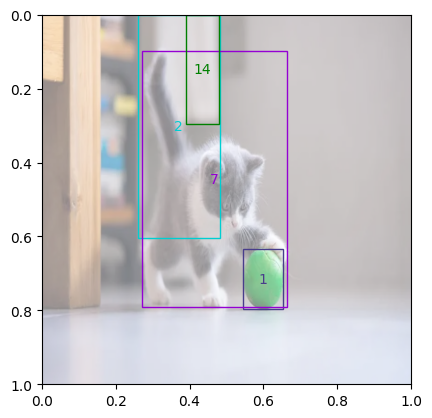

In [54]:
data[1].plot_regions()

In [30]:
from features.text_manager import TextFeature
def print_text_segms(consult):
  text = TextFeature(consult)
  print('\n------------------------------------')
  print('consult = '+consult[:50]+'...')
  for t in text.texts:
      print(t)
      for key in t.neighbords:
        if t.neighbords != []:
          for value in t.neighbords[key]:
            print(f'  ⦿ {key}: {value}')



In [94]:
def find(consult):
  text = TextFeature(consult)
  max = 0
  img = None
  for image in data:
    print(f'{image.name}: ', end = "")
    sim = Similarity.full(text,image)
    print(sim)
    if sim > max:
      max = sim
      img = image
  return img


In [83]:
consult0 = 'in the center of image there are tow dogs sittin in a black and white couch. A dog beside to a dark gray dog.  below the dog there are a black couch. right to a couch there are a black statue of buda. On top of couch are a white window.'
consult1 = 'in the right right of the photo there are a cat sleeping on pink blanked. right to the cat are another cat with a remote control'
consult2 = 'a cartton ilistration of a dog and a cat on a orange couch in the center of the picture. The dog sleeping on a blue pillow in right. left to the dog there are a gray cat laying'

In [79]:
print_text_segms(consult0)
print_text_segms(consult1)
print_text_segms(consult2)


------------------------------------
consult = in the center of image there are tow dogs sittin i...
text: tow dogs sittin in a black and white couch
pos: (0.5, 0.5)
text: a dark gray dog
pos: None
  ⦿ beside: (a dog, 1)
text: dog
pos: None
  ⦿ s: (a black couch, 1)
text: a couch
pos: None
  ⦿ e: (a black statue of buda, 1)
text: couch
pos: None
  ⦿ n: (a white window, 1)

------------------------------------
consult = in the right right of the photo there are a cat sl...
text: a cat sleeping on pink blanked
pos: (0.833, 0.5)
text: cat
pos: None
  ⦿ e: (another cat with a remote control, 1)

------------------------------------
consult = a cartton ilistration of a dog and a cat on a oran...
text: a cartton ilistration of a dog and a cat on a orange couch
pos: (0.5, 0.5)
text: dog sleeping on a blue pillow
pos: (0.833, 0.5)
text: dog
pos: None
  ⦿ w: (a gray cat laying, 1)


['..', '..', 'images', 'image_5.png']: 0.18111927807331085
['..', '..', 'images', 'image_6.jpg']: 0.17510713636875153
['..', '..', 'images', 'image_4.jpg']: 1.8436580182772708
['..', '..', 'images', 'image_1.jpg']: 0.19233258068561554
['..', '..', 'images', 'image_7.jpg']: 0.24232546985149384
['..', '..', 'images', 'image_2.jpg']: 0.5156754651521469
['..', '..', 'images', 'image_3.jpg']: 1.325217848863333


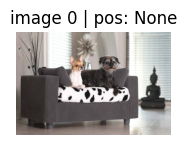

In [98]:
find(consult0).origin.plot()